Paracial 1 Est: Eva L. ALdunate S.

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import zipfile
import os

# Ruta al archivo .zip en Drive
zip_path = "/content/drive/MyDrive/documentos de IA_COM300/Dataset parcial 1/archive.zip"  # Ajusta la ruta

# Descomprimir en Colab
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/dataset")  # Extrae todo en una carpeta llamada "dataset"

print("¡Archivo descomprimido! Contenido:")
!ls "/content/dataset"

¡Archivo descomprimido! Contenido:
colorclassification  ColorClassification


In [19]:
!ls -R "/content/dataset"  # Lista recursiva (muestra subcarpetas)

/content/dataset:
colorclassification  ColorClassification

/content/dataset/colorclassification:
ColorClassification

/content/dataset/colorclassification/ColorClassification:
Black		      Green	  mask_blue    mask_red     mask_yellow   testimg	 White
Blue		      hw3.m~	  mask_brown   mask_test    m_images.txt  timages.txt	 yellow
Brown		      images.txt  mask_green   mask_violet  orange	  tm_images.txt
color-classification  mask_black  mask_orange  mask_white   red		  Violet

/content/dataset/colorclassification/ColorClassification/Black:
10.jpg	11.jpg	12.jpg	1.jpg  2.jpg  3.jpg  4.jpg  6.jpg  7.jpg  8.jpg  9.jpg

/content/dataset/colorclassification/ColorClassification/Blue:
10.jpg	1.jpg  2.jpg  3.jpg  4.jpg  5.jpg  6.jpg  7.jpg  8.jpg	9.jpg

/content/dataset/colorclassification/ColorClassification/Brown:
10.jpg	12.jpg	14.jpg	16.jpg	18.jpg	1.jpg	2.jpg  4.jpg  6.jpg  8.jpg
11.jpg	13.jpg	15.jpg	17.jpg	19.jpg	20.jpg	3.jpg  5.jpg  7.jpg  9.jpg

/content/dataset/colorclassification/Color

In [20]:
import os
import cv2
import pandas as pd
import numpy as np

# ---------------------------------------------------
# PASO 1: Configuración de rutas (¡AJUSTA ESTO!)
# ---------------------------------------------------
base_path = "/content/dataset/ColorClassification"  # Ruta donde está images.txt
images_dir = "/content/dataset/ColorClassification"  # Ruta de las carpetas de imágenes

# Verifica la estructura
print("Contenido del dataset:")
!ls -R "{base_path}"

# ---------------------------------------------------
# PASO 2: Procesar metadatos (images.txt)
# ---------------------------------------------------
metadata_path = f"{base_path}/images.txt"

try:
    with open(metadata_path, "r") as f:
        metadata = [line.strip().split() for line in f.readlines()]

    df_meta = pd.DataFrame(metadata, columns=["image_path", "label_id"])
    df_meta["label_id"] = df_meta["label_id"].astype(int)

    # Mapeo de etiquetas (completa según tu dataset)
    label_map = {
        0: "Black",
        1: "Blue",
        2: "Brown",
        3: "ColorClassification",
        4: "color-classification",
        5: "Green",
        6: "mask_black",
        7: "mask_blue",
        8: "mask_brown",
        9: "mask_green",
        10: "mask_orange",
        11: "mask_red",
        12: "mask_test",
        13: "mask_violet",
        14: "mask_white",
        15: "mask_yellow",
        16: "orange",
        17: "red",
        18: "testimg",
        19: "Violet",
        20: "White",
        21: "yellow"
        # ... añade todas las clases que aparezcan en images.txt
    }
    df_meta["class_name"] = df_meta["label_id"].map(label_map)

    print("\nMetadatos cargados correctamente:")
    print(df_meta.head())

except FileNotFoundError:
    print(f"\n¡Error! No se encontró el archivo {metadata_path}")
    print("Asegúrate de que:")
    print(f"1. La ruta base '{base_path}' es correcta")
    print(f"2. El archivo 'images.txt' existe en esa ubicación")

Contenido del dataset:
/content/dataset/ColorClassification:
Black		      Green	  mask_blue    mask_red     mask_yellow   testimg	 White
Blue		      hw3.m~	  mask_brown   mask_test    m_images.txt  timages.txt	 yellow
Brown		      images.txt  mask_green   mask_violet  orange	  tm_images.txt
color-classification  mask_black  mask_orange  mask_white   red		  Violet

/content/dataset/ColorClassification/Black:
10.jpg	11.jpg	12.jpg	1.jpg  2.jpg  3.jpg  4.jpg  6.jpg  7.jpg  8.jpg  9.jpg

/content/dataset/ColorClassification/Blue:
10.jpg	1.jpg  2.jpg  3.jpg  4.jpg  5.jpg  6.jpg  7.jpg  8.jpg	9.jpg

/content/dataset/ColorClassification/Brown:
10.jpg	12.jpg	14.jpg	16.jpg	18.jpg	1.jpg	2.jpg  4.jpg  6.jpg  8.jpg
11.jpg	13.jpg	15.jpg	17.jpg	19.jpg	20.jpg	3.jpg  5.jpg  7.jpg  9.jpg

/content/dataset/ColorClassification/color-classification:
binary_img.asv	Black  Brown		extract_features.m  hw3.m	mask_black  mask_brown
binary_img.m	Blue   color_moments.m	Green		    images.txt	mask_blue   mask_green


In [21]:
# Dentro del bucle donde procesas las imágenes:
for idx, row in df_meta.iterrows():
    # Construye la ruta CORRECTA (2 opciones):

    # Opción 1: Si images.txt usa rutas relativas como "Black/1.jpg"
    img_path = os.path.join(images_dir, row["image_path"])

    # Opción 2: Si images.txt usa rutas completas (poco común)
    # img_path = os.path.join(base_path, row["image_path"])

    img = cv2.imread(img_path)
    if img is None:
        print(f"¡Imagen no encontrada! Verifica la ruta: {img_path}")
        continue

In [22]:
# Prueba con la primera imagen del metadata
test_path = os.path.join(images_dir, df_meta.iloc[0]["image_path"])
print(f"\nIntentando cargar: {test_path}")

test_img = cv2.imread(test_path)
if test_img is not None:
    print("¡Imagen cargada correctamente!")
    print(f"Dimensiones: {test_img.shape}")
else:
    print("¡Fallo al cargar la imagen! Revisa:")
    print(f"1. Que la carpeta '{images_dir}' existe")
    print(f"2. Que el archivo '{df_meta.iloc[0]['image_path']}' existe dentro de ella")


Intentando cargar: /content/dataset/ColorClassification/Black/1.jpg
¡Imagen cargada correctamente!
Dimensiones: (1050, 1680, 3)


In [24]:
#completar procesamiento de imagenes
from skimage.feature import graycomatrix, graycoprops

def extract_features(img):
    """Extrae 20+ atributos de cada imagen"""
    try:
        # 1. Características básicas de color (5)
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        color_mean = list(np.mean(img, axis=(0, 1))) + [np.mean(hsv[:,:,0]), np.mean(hsv[:,:,1])]  # R,G,B + H,S

        # 2. Estadísticas de color (5)
        color_std = list(np.std(img, axis=(0, 1))) + [np.std(hsv[:,:,0]), np.std(hsv[:,:,1])]

        # 3. Texturas (10+)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        glcm = graycomatrix(gray, distances=[1, 2], angles=[0], levels=256, symmetric=True, normed=True)
        contrast = graycoprops(glcm, 'contrast')[0, 0]
        energy = graycoprops(glcm, 'energy')[0, 0]
        homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]

        # 4. Histograma (5 bins)
        hist = np.histogram(gray, bins=5)[0].tolist()

        return color_mean + color_std + [contrast, energy, homogeneity] + hist

    except Exception as e:
        print(f"Error en extract_features: {e}")
        return None

# Procesar TODAS las imágenes
features = []
for idx, row in df_meta.iterrows():
    img_path = os.path.join(images_dir, row["image_path"])
    img = cv2.imread(img_path)
    if img is None:
        continue

    feat = extract_features(img)
    if feat:
        features.append(feat + [row["class_name"]])

# Crear DataFrame
columns = ["R_mean", "G_mean", "B_mean", "H_mean", "S_mean",
           "R_std", "G_std", "B_std", "H_std", "S_std",
           "Contrast", "Energy", "Homogeneity",
           "Hist1", "Hist2", "Hist3", "Hist4", "Hist5",
           "Label"]
df = pd.DataFrame(features, columns=columns)

In [38]:
# Generación de Datos Sintéticos para que se pueda hacer un entrenamiento con 10,000 ejemlos y 20 atributos
# Generar 9899 muestras sintéticas de colores (R, G, B entre 0 y 255)
np.random.seed(42)
R = np.random.randint(0, 256, size=9899)
G = np.random.randint(0, 256, size=9899)
B = np.random.randint(0, 256, size=9899)

# Crear etiquetas sintéticas (ejemplo: basado en reglas de color)
def assign_label(r, g, b):
    if r > 200 and g > 200 and b > 200:  # Tonos claros → Estilo "Minimalista"
        return 0
    elif r > g and r > b:                # Dominante rojo → Estilo "Vintage"
        return 1
    # ... Añade más reglas según tus clases
    else:
        return np.random.randint(0, 7)  # Aleatorio para otras clases

labels = [assign_label(r, g, b) for r, g, b in zip(R, G, B)]

# Crear DataFrame sintético
df_synth = pd.DataFrame({'R': R, 'G': G, 'B': B, 'Label': labels})



In [39]:
#Combina los datos originales y sintéticos:
df_final = pd.concat([df, df_synth], ignore_index=True)

<Axes: xlabel='Label'>

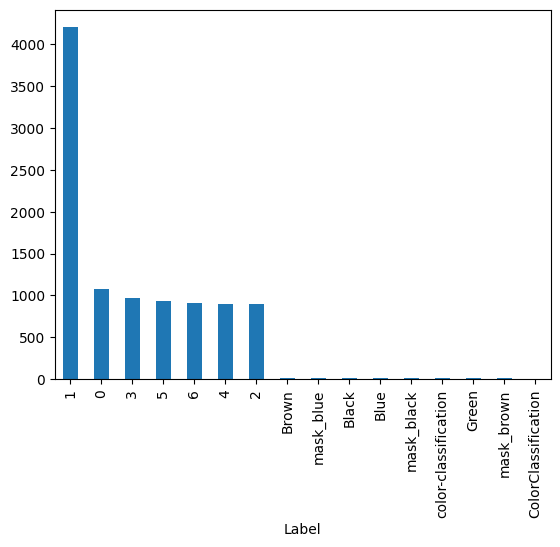

In [40]:
#Verifica las etiquetas
df_final['Label'].value_counts().plot(kind='bar')  # Debe mostrar las 7 clases balanceadas

In [41]:
# Verifica las columnas de tu DataFrame original
print(df.columns)
print(f"Número de ejemplos reales: {len(df)}")

Index(['R_mean', 'G_mean', 'B_mean', 'H_mean', 'S_mean', 'R_std', 'G_std',
       'B_std', 'H_std', 'S_std', 'Contrast', 'Energy', 'Homogeneity', 'Hist1',
       'Hist2', 'Hist3', 'Hist4', 'Hist5', 'Label'],
      dtype='object')
Número de ejemplos reales: 101


Número total de ejemplos: 10000
Distribución de clases:
Label
Futurista               2069
Orgánico                1934
Retro                   1436
Vintage                 1341
Industrial              1185
Minimalista             1002
Pop-Art                  932
Brown                     18
mask_blue                 16
Black                     11
Blue                      10
mask_black                10
color-classification      10
Green                     10
mask_brown                 9
ColorClassification        7
Name: count, dtype: int64


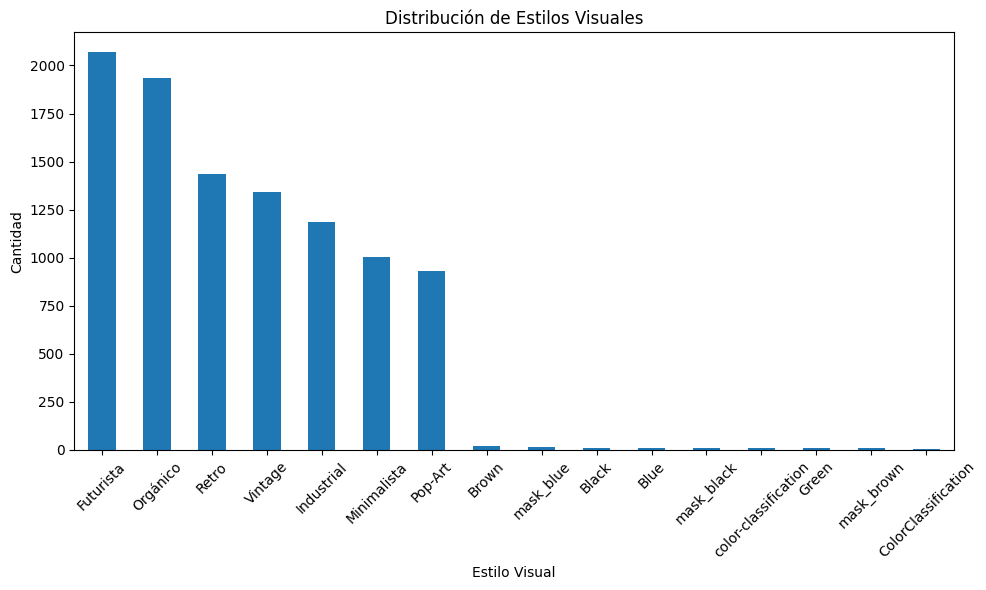

In [42]:
# Lista de estilos visuales para tu proyecto
estilos_visuales = ["Minimalista", "Vintage", "Futurista", "Retro", "Industrial", "Orgánico", "Pop-Art"]

# Generar datos sintéticos con las mismas columnas que tus datos originales
num_synthetic = 10000 - len(df)
synthetic_data = []

for _ in range(num_synthetic):
    # Generar valores RGB
    r = np.random.randint(0, 256)
    g = np.random.randint(0, 256)
    b = np.random.randint(0, 256)

    # Convertir a HSV
    rgb_array = np.array([[[b, g, r]]], dtype=np.uint8)  # OpenCV usa BGR
    hsv_array = cv2.cvtColor(rgb_array, cv2.COLOR_BGR2HSV)[0, 0]
    h, s, v = hsv_array

    # Generar características con distribuciones realistas
    r_mean, g_mean, b_mean = r, g, b
    h_mean, s_mean = h, s

    # Desviaciones estándar (simuladas)
    r_std = np.random.uniform(5, 30)
    g_std = np.random.uniform(5, 30)
    b_std = np.random.uniform(5, 30)
    h_std = np.random.uniform(5, 20)
    s_std = np.random.uniform(5, 20)

    # Características de textura (simuladas)
    contrast = np.random.uniform(0, 1)
    energy = np.random.uniform(0, 1)
    homogeneity = np.random.uniform(0, 1)

    # Histograma (simulado)
    hist = np.random.randint(0, 100, 5).tolist()

    # Asignar estilo visual basado en reglas de color
    if r > 200 and g > 200 and b > 200:  # Tonos claros → Minimalista
        label = "Minimalista"
    elif r > 180 and g < 100 and b < 100:  # Rojo dominante → Vintage
        label = "Vintage"
    elif b > 180 and r < 100:  # Azul dominante → Futurista
        label = "Futurista"
    elif r > 180 and g > 140 and b < 100:  # Naranja/Amarillo → Retro
        label = "Retro"
    elif abs(r - g) < 30 and abs(g - b) < 30 and r < 150:  # Grises → Industrial
        label = "Industrial"
    elif g > 180 and r < 150 and b < 150:  # Verde dominante → Orgánico
        label = "Orgánico"
    else:  # Otros colores → Pop-Art o aleatorio
        label = np.random.choice(estilos_visuales)

    # Crear entrada con todas las características
    entry = [r_mean, g_mean, b_mean, h_mean, s_mean,
             r_std, g_std, b_std, h_std, s_std,
             contrast, energy, homogeneity] + hist + [label]

    synthetic_data.append(entry)

# Crear DataFrame sintético con las mismas columnas que el original
df_synth = pd.DataFrame(synthetic_data, columns=columns)

# Combinar con datos originales
df_final = pd.concat([df, df_synth], ignore_index=True)

print(f"Número total de ejemplos: {len(df_final)}")
print(f"Distribución de clases:\n{df_final['Label'].value_counts()}")

# Visualizar distribución
import matplotlib.pyplot as plt
df_final['Label'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Distribución de Estilos Visuales')
plt.ylabel('Cantidad')
plt.xlabel('Estilo Visual')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Modelo de logistico.

In [43]:
#llamar libreria
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import seaborn as sns

In [44]:
#preparacion de datos
# Convertir etiquetas categóricas a numéricas
le = LabelEncoder()
df_final['Label_encoded'] = le.fit_transform(df_final['Label'])

# Dividir en características y etiquetas
X = df_final.drop(['Label', 'Label_encoded'], axis=1)
y = df_final['Label_encoded']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
#modelo de regresionlogistica
print("Entrenando Regresión Logística...")

# Inicializar y entrenar el modelo
logreg = LogisticRegression(max_iter=1000, C=1.0, solver='lbfgs', multi_class='multinomial', random_state=42)
logreg.fit(X_train_scaled, y_train)

# Predicciones
y_pred_logreg = logreg.predict(X_test_scaled)
y_prob_logreg = logreg.predict_proba(X_test_scaled)

# Evaluación
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"\n--- Resultados de Regresión Logística ---")
print(f"Precisión: {accuracy_logreg:.4f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_logreg, target_names=le.classes_))



Entrenando Regresión Logística...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



--- Resultados de Regresión Logística ---
Precisión: 0.4155

Reporte de clasificación:
                      precision    recall  f1-score   support

               Black       1.00      0.25      0.40         4
                Blue       0.00      0.00      0.00         5
               Brown       0.33      0.67      0.44         3
 ColorClassification       0.33      1.00      0.50         1
           Futurista       0.43      0.63      0.51       382
               Green       0.67      1.00      0.80         2
          Industrial       0.31      0.32      0.32       237
         Minimalista       0.14      0.02      0.04       195
            Orgánico       0.51      0.61      0.56       390
             Pop-Art       0.00      0.00      0.00       196
               Retro       0.44      0.41      0.43       288
             Vintage       0.36      0.49      0.41       284
color-classification       1.00      0.33      0.50         6
          mask_black       0.00      0.00  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


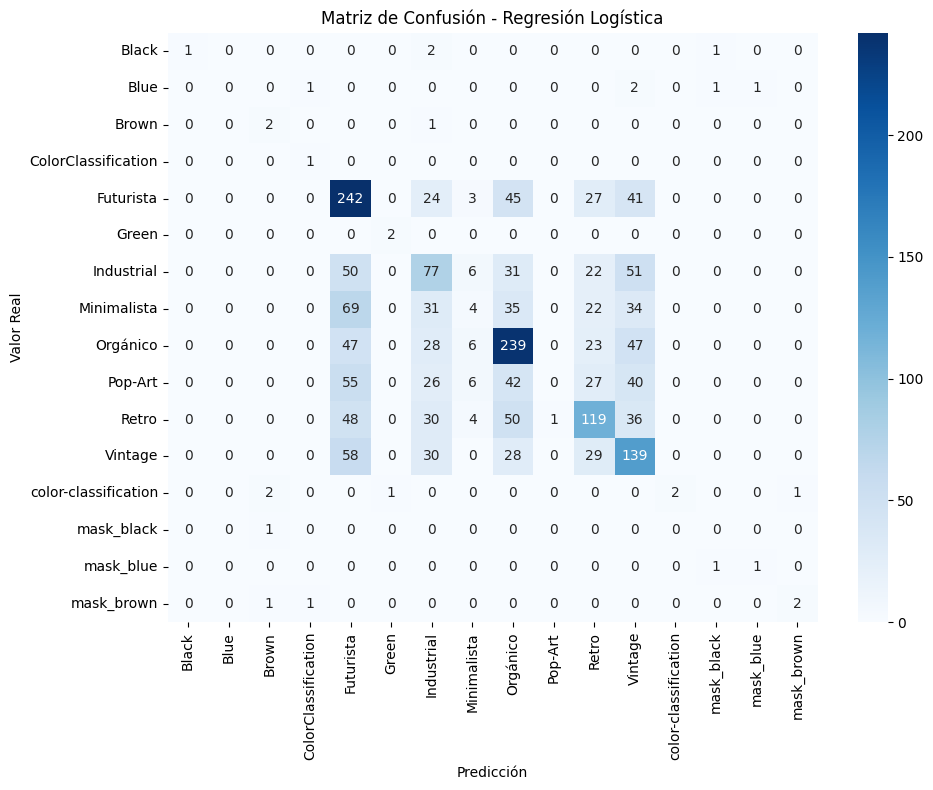

In [47]:
# Matriz de confusión
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Regresión Logística')
plt.tight_layout()
plt.show()

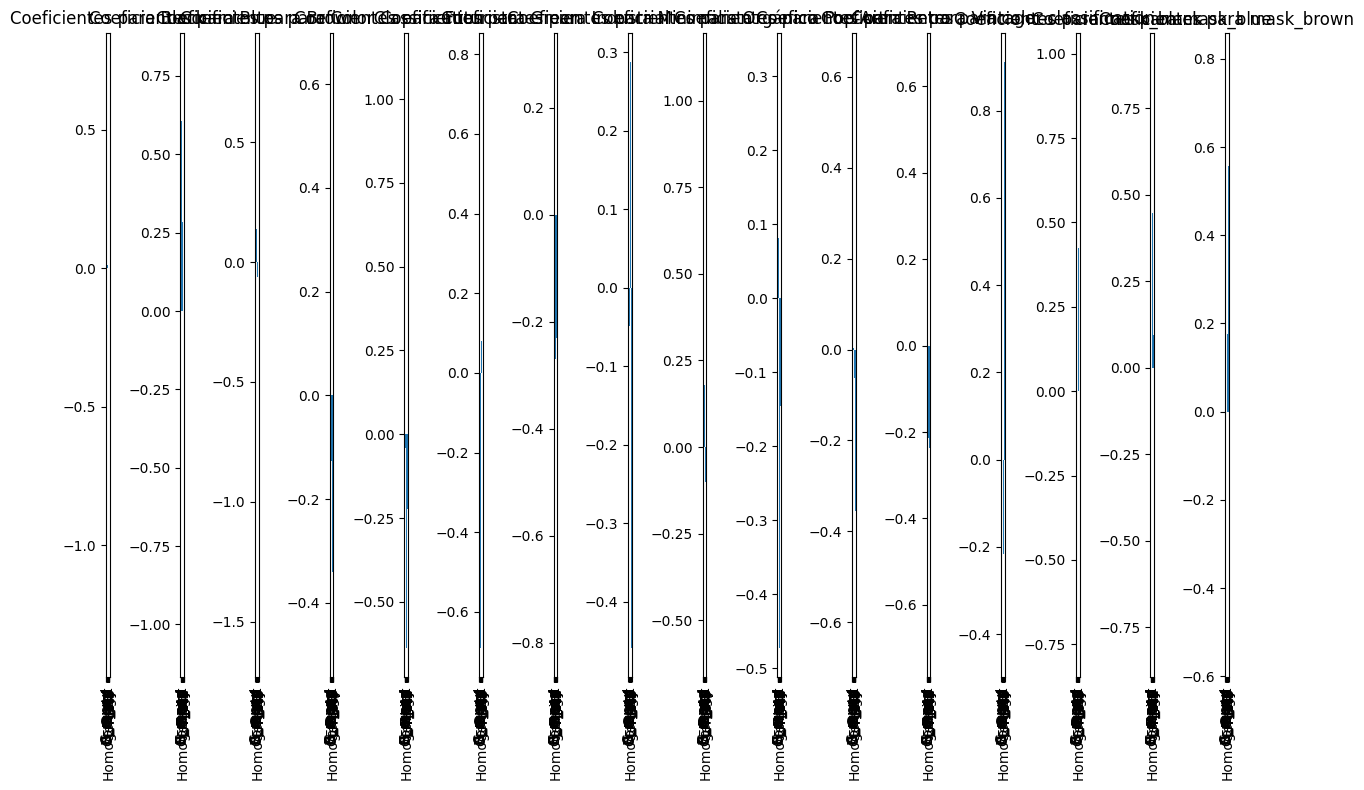

In [48]:
# Visualizar los coeficientes (pesos) para ver la importancia de las características
# Para cada clase, obtenemos los coeficientes y los graficamos
plt.figure(figsize=(12, 8))
for i, class_name in enumerate(le.classes_):
    if hasattr(logreg, 'coef_'):  # Para modelos multiclase
        plt.subplot(1, len(le.classes_), i+1)
        coef = logreg.coef_[i]
        plt.bar(range(len(coef)), coef)
        plt.xticks(range(len(coef)), X.columns, rotation=90)
        plt.title(f'Coeficientes para {class_name}')
plt.tight_layout()
plt.show()

modelo de red neuronal MLP

In [49]:
# Definir parámetros
input_size = X.shape[1]
hidden_size1 = 64
hidden_size2 = 32
output_size = len(le.classes_)
learning_rate = 0.001
num_epochs = 50
batch_size = 64

In [50]:
# Convertir datos a tensores de PyTorch
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.LongTensor(y_train.values)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.LongTensor(y_test.values)


In [51]:
# Crear DataLoader
class StyleDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = StyleDataset(X_train_tensor, y_train_tensor)
test_dataset = StyleDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)


In [52]:
# Definir modelo MLP con 2 capas ocultas
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(MLP, self).__init__()
        # Primera capa oculta
        self.layer1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        # Segunda capa oculta
        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        # Capa de salida
        self.output_layer = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        # Capa 1
        out = self.layer1(x)
        out = self.relu1(out)
        # Capa 2
        out = self.layer2(out)
        out = self.relu2(out)
        # Salida
        out = self.output_layer(out)
        return out


In [53]:
# Inicializar modelo
model = MLP(input_size, hidden_size1, hidden_size2, output_size)
print("\nEstructura de la Red Neuronal:")
print(model)

# Definir función de costo y optimizador
criterion = nn.CrossEntropyLoss()  # Para clasificación multiclase
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Listas para almacenar pérdida y precisión
train_losses = []
train_accs = []
test_losses = []
test_accs = []


Estructura de la Red Neuronal:
MLP(
  (layer1): Linear(in_features=18, out_features=64, bias=True)
  (relu1): ReLU()
  (layer2): Linear(in_features=64, out_features=32, bias=True)
  (relu2): ReLU()
  (output_layer): Linear(in_features=32, out_features=16, bias=True)
)


In [54]:
# Función para calcular precisión
def calculate_accuracy(model, data_loader):
    correct = 0
    total = 0
    model.eval()  # Modo evaluación
    with torch.no_grad():
        for inputs, labels in data_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

# Entrenamiento
print("\nEntrenando Red Neuronal MLP...")
for epoch in range(num_epochs):
    model.train()  # Modo entrenamiento
    running_loss = 0.0

    for i, (inputs, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Descenso por gradiente
        optimizer.zero_grad()  # Limpiar gradientes anteriores
        loss.backward()        # Retropropagación
        optimizer.step()       # Actualizar pesos

        running_loss += loss.item()

    # Calcular métricas para esta época
    avg_train_loss = running_loss / len(train_loader)
    train_accuracy = calculate_accuracy(model, train_loader)

    # Calcular pérdida y precisión en conjunto de prueba
    model.eval()
    with torch.no_grad():
        test_loss = sum(criterion(model(inputs), labels).item() for inputs, labels in test_loader) / len(test_loader)
    test_accuracy = calculate_accuracy(model, test_loader)

    # Almacenar métricas
    train_losses.append(avg_train_loss)
    train_accs.append(train_accuracy)
    test_losses.append(test_loss)
    test_accs.append(test_accuracy)

    # Mostrar progreso
    if (epoch + 1) % 5 == 0:
        print(f'Época [{epoch+1}/{num_epochs}], Pérdida: {avg_train_loss:.4f}, '
              f'Precisión Train: {train_accuracy:.4f}, Precisión Test: {test_accuracy:.4f}')



Entrenando Red Neuronal MLP...
Época [5/50], Pérdida: 2.0573, Precisión Train: 0.2833, Precisión Test: 0.2675
Época [10/50], Pérdida: 1.8185, Precisión Train: 0.3224, Precisión Test: 0.3080
Época [15/50], Pérdida: 1.7029, Precisión Train: 0.3840, Precisión Test: 0.3700
Época [20/50], Pérdida: 1.6471, Precisión Train: 0.4215, Precisión Test: 0.4060
Época [25/50], Pérdida: 1.6158, Precisión Train: 0.4318, Precisión Test: 0.4195
Época [30/50], Pérdida: 1.5932, Precisión Train: 0.4368, Precisión Test: 0.4220
Época [35/50], Pérdida: 1.5754, Precisión Train: 0.4415, Precisión Test: 0.4215
Época [40/50], Pérdida: 1.5614, Precisión Train: 0.4414, Precisión Test: 0.4230
Época [45/50], Pérdida: 1.5495, Precisión Train: 0.4422, Precisión Test: 0.4255
Época [50/50], Pérdida: 1.5383, Precisión Train: 0.4416, Precisión Test: 0.4245


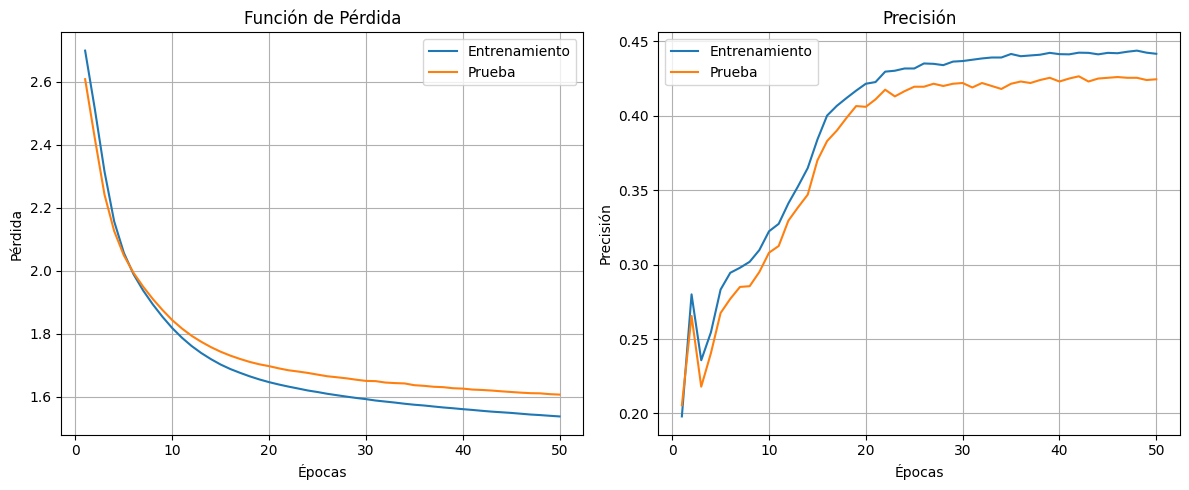


--- Resultados de la Red Neuronal MLP ---
Precisión: 0.4245

Reporte de clasificación:
                      precision    recall  f1-score   support

               Black       0.00      0.00      0.00         4
                Blue       0.00      0.00      0.00         5
               Brown       0.50      0.33      0.40         3
 ColorClassification       0.00      0.00      0.00         1
           Futurista       0.46      0.62      0.53       382
               Green       0.29      1.00      0.44         2
          Industrial       0.28      0.37      0.32       237
         Minimalista       0.21      0.09      0.12       195
            Orgánico       0.56      0.59      0.57       390
             Pop-Art       0.33      0.01      0.01       196
               Retro       0.50      0.44      0.47       288
             Vintage       0.35      0.51      0.42       284
color-classification       0.00      0.00      0.00         6
          mask_black       0.00      0.00  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [55]:
# Visualizar curvas de aprendizaje
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Entrenamiento')
plt.plot(range(1, num_epochs+1), test_losses, label='Prueba')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Función de Pérdida')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accs, label='Entrenamiento')
plt.plot(range(1, num_epochs+1), test_accs, label='Prueba')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Precisión')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluación final
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Métricas finales
accuracy_nn = accuracy_score(y_true, y_pred)
print(f"\n--- Resultados de la Red Neuronal MLP ---")
print(f"Precisión: {accuracy_nn:.4f}")
print("\nReporte de clasificación:")
print(classification_report(y_true, y_pred, target_names=le.classes_))


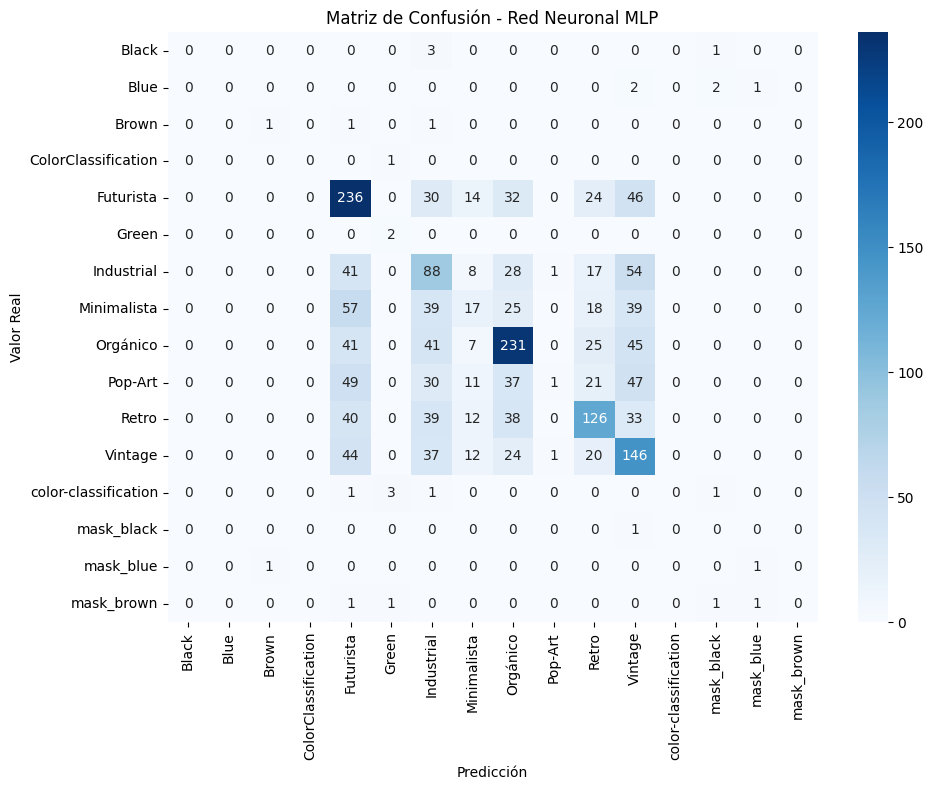

In [56]:
# Matriz de confusión
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Red Neuronal MLP')
plt.tight_layout()
plt.show()


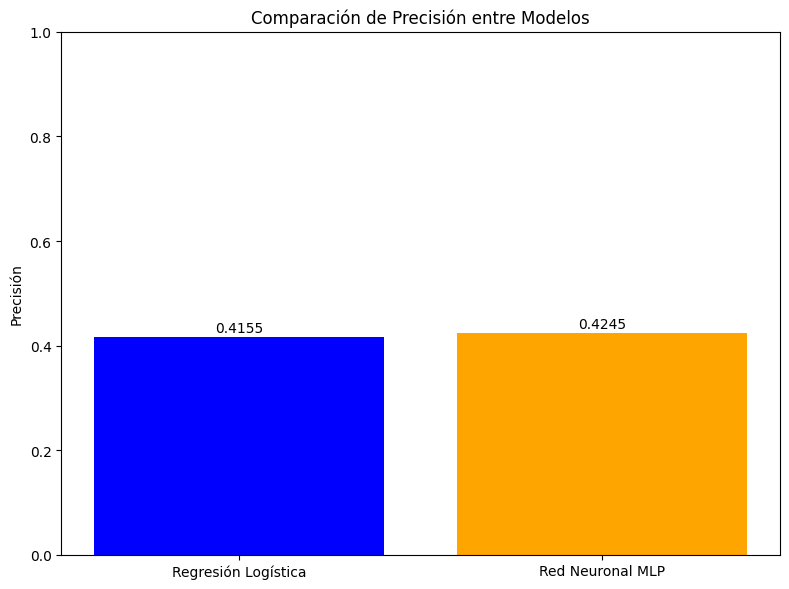

In [57]:
# Comparación de modelos
models = ['Regresión Logística', 'Red Neuronal MLP']
accuracies = [accuracy_logreg, accuracy_nn]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Precisión')
plt.title('Comparación de Precisión entre Modelos')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.tight_layout()
plt.show()